# CNN Assignment (Graded): Image Classification with Fashion MNSIT Dataset

Welcome to your programming assignment on Convolutional Neural Networks! You will build a Convolutional Neural Network (CNN) to classify images of the MNIST Fashion Dataset. 

## Problem Description

- In this assignment, you will build a Convolutional Neural Network (CNN) to classify images from the Fashion MNIST dataset.

- This dataset consists of 70,000 grayscale images in 10 categories and is considered to be more challenging than the original MNIST dataset.

## Dataset Description

An overview of the fashion MNIST dataset:

- 60,000 training images

- 10,000 test images
- 10 classes of clothing items
- Image size: 28x28 pixels (grayscale)

For more information, refer to this link: [Fashion MNIST Dataset](https://github.com/zalandoresearch/fashion-mnist)

## Assignment Tasks

**1. Data Preparation**
   - Normalize the pixel values
   
   - Split the data into training and validation sets

**2. Model Architecture**
   - Design a CNN with at least 2 convolutional layers and 1 dense layer
   - Include appropriate activation functions, pooling layers, and a flatten layer

**3. Model Compilation**
   - Choose an appropriate optimizer and loss function
   - Select accuracy as the metric to monitor

**4. Model Training**
   - Train the model for at least 10 epochs
   - Use a validation split to monitor for overfitting

**5. Model Evaluation**
   - Evaluate the model on the test set
   - Plot the training and validation accuracy/loss curves

**6. Predictions and Visualization**
   - Make predictions on a few test images
   - Visualize these images along with their predicted and actual labels

## Instructions

- Only write code when you see any of the below prompts,

    ```
    # YOUR CODE GOES HERE
    # YOUR CODE ENDS HERE
    # TODO
    ```

- Do not modify any other section of the code unless tated otherwise in the comments.

# Code Section

In [1]:
# import the necessary packages
import numpy as np
import tensorflow as tf
from helpers.methods import load_data, detect_and_set_device, display_image_grid, plot_training_history, plot_predictions
from tests.test_methods import test_preprocess_data, test_create_model, test_train_model, test_evaluate_model, test_make_predictions

In [2]:
# Load the data into training and testing sets
x_train, y_train, x_test, y_test = load_data(data_dir='students/<your_username>')

Fashion MNIST dataset downloaded successfully!


## Task: Let's get to know about our dataset

### Shape of the dataset: Testing and Training

In [3]:
# TODO: Shape of the data

x_train_shape = x_train.shape
x_test_shape = x_test.shape
y_train_shape = y_train.shape
y_test_shape = y_test.shape
# len(np.unique()) counts how many different values exist in y_train
number_of_classes = len(np.unique(y_train))


print(f"Training Data Shape: {x_train_shape}")
print(f"Training Labels Shape: {y_train_shape}")
print(f"Test Data Shape: {x_test_shape}")
print(f"Test Labels Shape: {y_test_shape}")
print(f"Number of Classes: {number_of_classes}")

Training Data Shape: (60000, 28, 28, 1)
Training Labels Shape: (60000,)
Test Data Shape: (10000, 28, 28, 1)
Test Labels Shape: (10000,)
Number of Classes: 10


### Total number of images in each class

In [4]:
num_classes = len(np.unique(y_train))
for cls in range(num_classes):
  count = 0
  # YOUR CODE GOES HERE
  count = np.sum(y_train == cls)
  # YOUR CODE ENDS HERE
  print("Number of images belonging to {} is {}".format(cls, count))

Number of images belonging to 0 is 6000
Number of images belonging to 1 is 6000
Number of images belonging to 2 is 6000
Number of images belonging to 3 is 6000
Number of images belonging to 4 is 6000
Number of images belonging to 5 is 6000
Number of images belonging to 6 is 6000
Number of images belonging to 7 is 6000
Number of images belonging to 8 is 6000
Number of images belonging to 9 is 6000


## Task: Preprocessing the dataset

**Task Hints:**

Complete the preprocess_data method.

- Convert the pixel values of the training and test data (x_train and x_test) to floating-point numbers and scale them to the range [0, 1].

- Ensure that the labels (y_train and y_test) have the correct shape by reshaping them into column vectors (with dimensions (-1, 1)).

In [5]:
def preprocess_data(x_train, y_train, x_test, y_test):
   # Normalize the images to [0, 1] range
    # Divide by 255.0 (max pixel value) to scale from [0, 255] to [0, 1]
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Ensure labels are in the correct shape
    # Reshape labels to be 1D arrays if they aren't already
    # This ensures compatibility with categorical_crossentropy loss
    y_train = y_train.reshape(-1)  # Flatten to 1D: (n_samples,)
    y_test = y_test.reshape(-1)    # Flatten to 1D: (n_samples,)

    print("Training data shape:", x_train.shape)
    print("Training labels shape:", y_train.shape)
    print("Test data shape:", x_test.shape)
    print("Test labels shape:", y_test.shape)

    # Do not change the code below
    test_preprocess_data(x_train, y_train, x_test, y_test)

    return x_train, y_train, x_test, y_test 

## Task: Model Building

**Task Hints:**

Complete the create_model and compile_model function to define a CNN for image classification.

Layers:

- Add two Conv2D layers (32 and 64 filters) with ReLU activation and MaxPooling2D after each.

- Flatten the output using Flatten().
- Add a fully connected Dense layer with 64 neurons (ReLU), followed by a 10-neuron Dense layer with softmax for classification.

In [31]:
def create_model():
    model = tf.keras.models.Sequential([
        # YOUR CODE HERE: Define the architecture of the model
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    
    # Do not change the code below
    test_create_model(model)
    
    return model

Compile the model:

- Use Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric.

In [32]:
def compile_model(model):
    
    # YOUR CODE HERE: Compile the model
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

## Task: Model Training

**Task Hints:**

Complete the train_model function to train the CNN using the provided training data.

- Set epochs=10 and validation_split=0.2.

- Train the model using model.fit(), providing x_train, y_train, epochs, and validation_split.

In [33]:
np.random.seed(43)  # for reproducibility
tf.random.set_seed(43)  # for reproducibility

In [34]:
def train_model(model, x_train, y_train, runtime_device):
    # Define validation_split and epochs
    # validation_split: percentage of training data to use for validation
    # 0.2 means 20% for validation, 80% for training
    validation_split = 0.2
    
    # epochs: number of complete passes through the training dataset
    epochs = 10
    
    with tf.device('/' + runtime_device + ':0'):
        # YOUR CODE GOES HERE
        
        # Train the model using fit() method
        # - x_train: input training images
        # - y_train: corresponding labels
        # - epochs: how many times to iterate over entire dataset
        # - validation_split: automatically splits data into train/val sets
        history = model.fit(
            x_train,
            y_train,
            epochs=epochs,
            validation_split=validation_split
        )
        
        # YOUR CODE ENDS HERE
        
        # Do not change the code below
        test_train_model(history)
        
    return history




## Task: Model Evaluation

**Task Hints:**

Complete the evaluate_model function to test the trained model on the test dataset.

- Use model.evaluate() to calculate the loss and accuracy on x_test and y_test.

- Print the test accuracy for reference.



In [35]:
def evaluate_model(model, x_test, y_test, runtime_device):
    with tf.device('/' + runtime_device + ':0'):
        # YOUR CODE GOES HERE
        
        # Evaluate the model on test data
        # model.evaluate() returns [loss, accuracy] for the test set
        # It runs the model on x_test and compares predictions with y_test
        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
        
        # Print test accuracy for reference
        print(f"\nTest Accuracy: {test_acc:.4f}")
        print(f"Test Loss: {test_loss:.4f}")
        
        # YOUR CODE ENDS HERE
        
        # Do not change the code below
        test_evaluate_model(test_loss, test_acc)
        
        return test_loss, test_acc

## Task: Make Predictions with the Model

**Task Hints:**

Complete the make_predictions function to generate predictions using the trained model on the test dataset.

- Use model.predict() to generate predictions on x_test.



In [36]:
def make_predictions(model, x_test, runtime_device):
    with tf.device('/' + runtime_device + ':0'):
        # YOUR CODE GOES HERE
        
        # Generate predictions on test data
        # model.predict() returns probability distributions for each sample
        # Shape: (num_samples, num_classes)
        # Each row contains probabilities for all classes (sum = 1.0)
        predictions = model.predict(x_test, verbose=1)
        
        # YOUR CODE ENDS HERE
        
        # Do not change the code below
        # COMENTAR TEMPORALMENTE si da error:
        try:
            test_predict_model(predictions)
        except NameError:
            print("Warning: test_predict_model not found, skipping test")
            
    return predictions

## Driver Code to run the built pipeline

In [37]:
#---------------- Do not change the code below ----------------#
def run_classifier(x_train, y_train, x_test, y_test):
    data_dir = 'data'

    runtime_device = detect_and_set_device()

    x_train, y_train, x_test, y_test = preprocess_data(x_train, y_train, x_test, y_test)

    model = create_model()
    model = compile_model(model)
    history = train_model(model, x_train, y_train, runtime_device)
    evaluate_model(model, x_test, y_test, runtime_device)

    predictions = make_predictions(model, x_test, runtime_device)
    return history, predictions


In [38]:
if __name__ == '__main__':
    history, predictions = run_classifier(x_train, y_train, x_test, y_test)

GPU is not available. Using CPU.
Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000,)
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7554 - loss: 0.6698 - val_accuracy: 0.8704 - val_loss: 0.3562
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8739 - loss: 0.3406 - val_accuracy: 0.8894 - val_loss: 0.3058
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8944 - loss: 0.2866 - val_accuracy: 0.8994 - val_loss: 0.2803
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9077 - loss: 0.2506 - val_accuracy: 0.9022 - val_loss: 0.2711
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9168 - loss: 0.2220 - val_accuracy: 0.9049 - val_loss: 0.2684
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9267 - loss: 0.1980 - val_accuracy: 0.9064 - val_loss: 0.2639
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/st

## Plot Training History

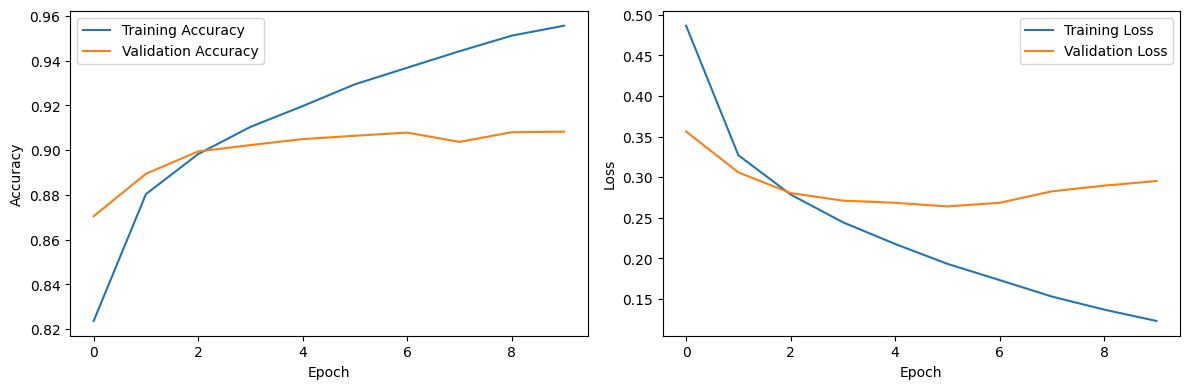

In [39]:
# Run this cell to plot the training history
plot_training_history(history)

## Plot Predictions

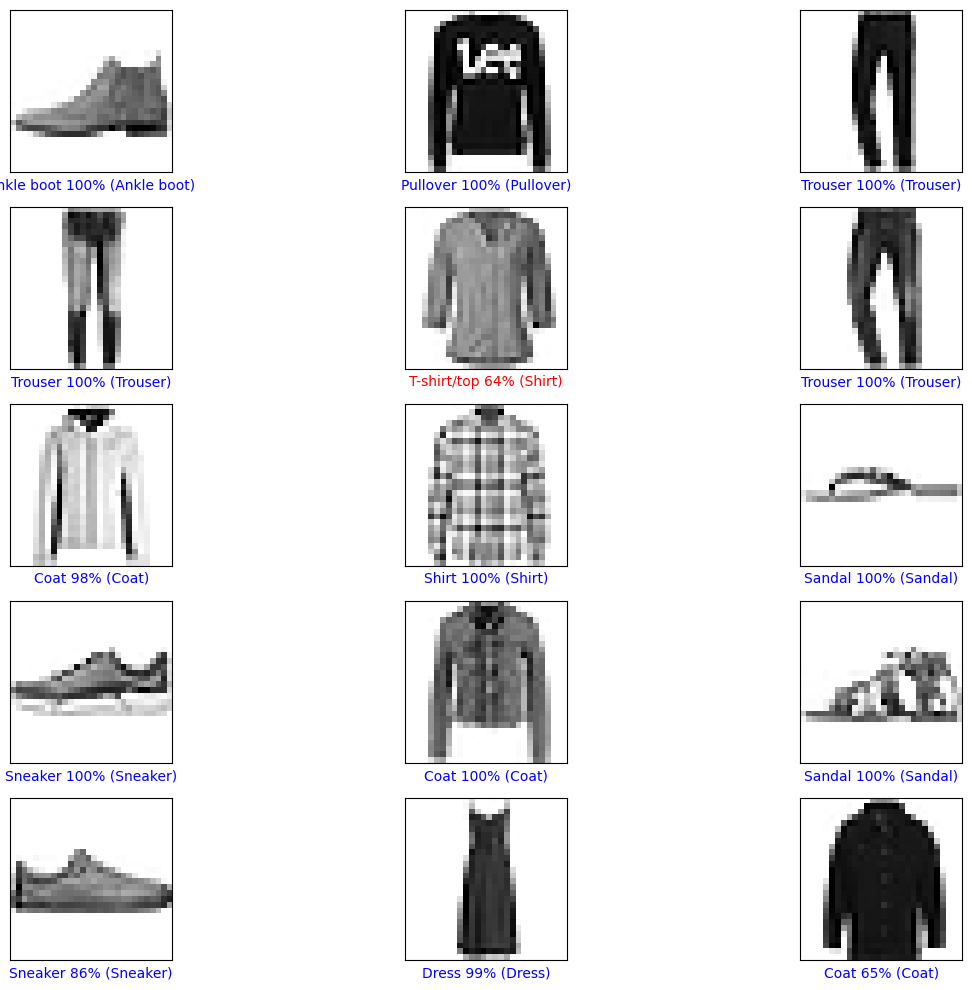

In [40]:
# Run this cell to plot the predictions
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_predictions(predictions, x_test, y_test, class_names)